In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
data_set = pd.read_csv('heart-disease.csv')
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Division de l'ensemble de données en données d'entrainement et en données de test

data_set= data_set.drop_duplicates()# Retrait des valeurs dupliquées
X = data_set.drop(columns='target')  
y = data_set['target']     
X_entrainement, X_test, y_entrainement, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

print(X_entrainement.shape)
print(X_test.shape)
print(y_entrainement.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


In [3]:
params = {'random_state': 0, 'max_depth': 4}
classifieur = DecisionTreeClassifier(**params)
classifieur.fit(X_entrainement, y_entrainement)
print("Précision des prédictions: {:.2f}".format(classifieur.score(X_test, y_test)))

Précision des prédictions: 0.84


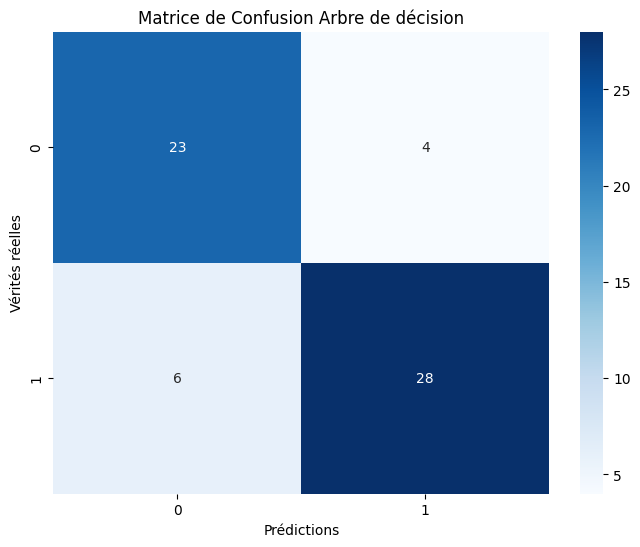

In [6]:
# predict and evaluate performance
def_y_pred = classifieur.predict(X_test)
matrice_confusion = confusion_matrix(y_test, def_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues')

plt.title('Matrice de Confusion Arbre de décision')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')
plt.show()

In [29]:
rapport = classification_report(y_test, def_y_pred, target_names=['Absence de maladie', 'Présence de maladie'])
print(rapport)

                     precision    recall  f1-score   support

 Absence de maladie       0.81      0.78      0.79        27
Présence de maladie       0.83      0.85      0.84        34

           accuracy                           0.82        61
          macro avg       0.82      0.82      0.82        61
       weighted avg       0.82      0.82      0.82        61



In [18]:
exactitude = accuracy_score(y_test,def_y_pred)
precision = precision_score(y_test,def_y_pred)
rappel = recall_score(y_test,def_y_pred)
print(f" Exactitude : { exactitude *100: .2f}")
print(f" precision : { precision *100: .2f}")
print(f" rappel : { rappel*100: .2f}")


 Exactitude :  83.61
 precision :  87.50
 rappel :  82.35


In [30]:
# Probabilités de la classe positive (présence de maladie)
y_probs = classifieur.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC : {auc:.2f}')


AUC : 0.77


In [8]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import argparse 

In [9]:
params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}

classifier = RandomForestClassifier(**params)
#classifier= ExtraTreesClassifier(**params)

In [12]:
classifier.fit(X_entrainement, y_entrainement)
print("Précision des prédictions: {:.2f}".format(classifier.score(X_test, y_test)))

Précision des prédictions: 0.89


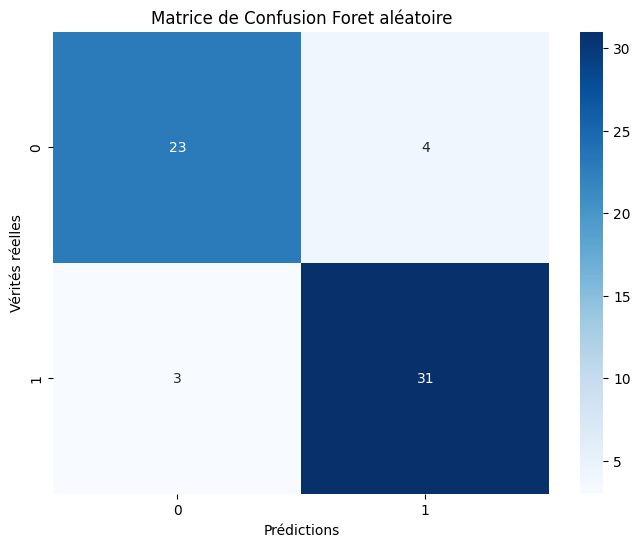

In [13]:
# predict and evaluate performance
def_y_pred = classifier.predict(X_test)
matrice_confusion = confusion_matrix(y_test, def_y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrice_confusion, annot=True, fmt='d', cmap='Blues')

plt.title('Matrice de Confusion Foret aléatoire')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')
plt.show()

In [24]:
exactitude = accuracy_score(y_test,def_y_pred)
precision = precision_score(y_test,def_y_pred)
rappel = recall_score(y_test,def_y_pred)
print(f" Exactitude : { exactitude *100: .2f}")
print(f" precision : { precision *100: .2f}")
print(f" rappel : { rappel*100: .2f}")


 Exactitude :  88.52
 precision :  88.57
 rappel :  91.18


In [27]:
# Probabilités de la classe positive (présence de maladie)
y_probs = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
print(f'AUC : {auc:.3f}')


AUC : 0.947


In [36]:
parameter_grid = [{'n_estimators': [100], 'max_depth':[2, 4, 7, 12, 
16]},
 {'max_depth': [4], 'n_estimators': [25, 50, 100, 
250]}
 ]
metrics = ['precision_weighted', 'recall_weighted']


In [37]:
for metric in metrics:
 print("\n##### Searching optimal parameters for", metric)
 
 classifier = GridSearchCV(
 ExtraTreesClassifier(random_state=0),
 parameter_grid, cv=5, scoring=metric)
 classifier.fit(X_entrainement, y_entrainement)
 results=classifier.cv_results_
 print("\nGrid scores for the parameter grid:")
 for i in range(len(results['params'])):
     params=results['params'][i]
     avg_score=results['mean_test_score'][i]
     print(f"mean test score: {avg_score: .4f} for parameters : {params}")
 
 print("\nBest parameters:", classifier.best_params_)
 y_pred = classifier.predict(X_test)
 print("\nPerformance report:\n")
 print(classification_report(y_test, y_pred))



##### Searching optimal parameters for precision_weighted

Grid scores for the parameter grid:
mean test score:  0.7999 for parameters : {'max_depth': 2, 'n_estimators': 100}
mean test score:  0.7930 for parameters : {'max_depth': 4, 'n_estimators': 100}
mean test score:  0.8254 for parameters : {'max_depth': 7, 'n_estimators': 100}
mean test score:  0.8097 for parameters : {'max_depth': 12, 'n_estimators': 100}
mean test score:  0.7922 for parameters : {'max_depth': 16, 'n_estimators': 100}
mean test score:  0.8280 for parameters : {'max_depth': 4, 'n_estimators': 25}
mean test score:  0.8073 for parameters : {'max_depth': 4, 'n_estimators': 50}
mean test score:  0.7930 for parameters : {'max_depth': 4, 'n_estimators': 100}
mean test score:  0.8026 for parameters : {'max_depth': 4, 'n_estimators': 250}

Best parameters: {'max_depth': 4, 'n_estimators': 25}

Performance report:

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        2

In [38]:
gs_best = classifier.best_estimator_
tuned_y_pred = gs_best.predict(X_test)
rapport = classification_report(y_test, tuned_y_pred, target_names=['Absence de maladie', 'Présence de maladie'])
print(rapport)


                     precision    recall  f1-score   support

 Absence de maladie       0.88      0.85      0.87        27
Présence de maladie       0.89      0.91      0.90        34

           accuracy                           0.89        61
          macro avg       0.89      0.88      0.88        61
       weighted avg       0.89      0.89      0.88        61



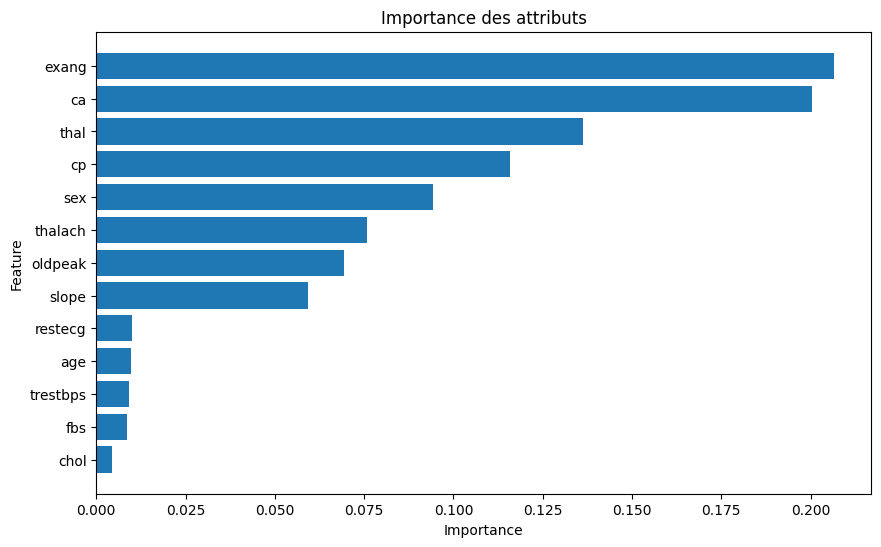

In [39]:
feature_importances = gs_best.feature_importances_
feature_names = X_test.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 9. Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Importance des attributs")
plt.gca().invert_yaxis()  # To show the most important features on top
plt.show()

In [40]:
base_estimator = DecisionTreeClassifier(max_depth=1, random_state=42)

# Initialize AdaBoost classifier
ada = AdaBoostClassifier(
     # Change from 'base_estimator' to 'estimator'
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)
# Train the model
ada.fit(X_entrainement, y_entrainement)

C:\Users\Mr BOUZ\AI\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, random_state=42)

Accuracy: 0.8689


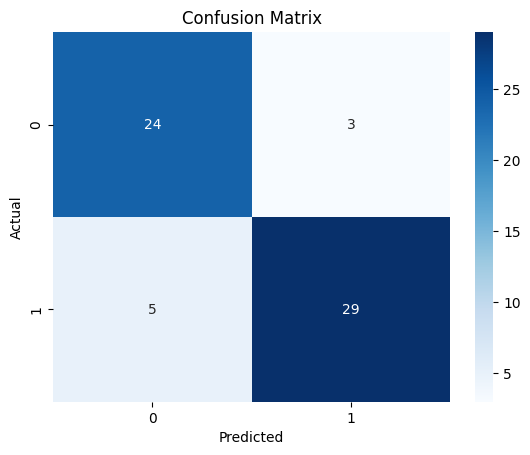

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [42]:
y_pred = ada.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

AUC: 0.8896


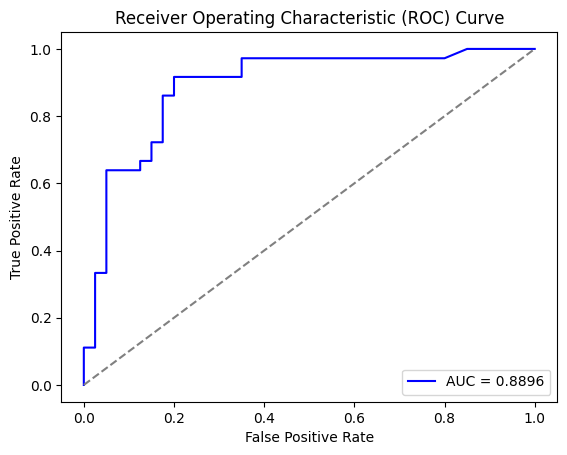

In [19]:
best_ada = grid_search.best_estimator_

# Predict probabilities for the positive class
y_pred_prob = best_ada.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
gb = GradientBoostingClassifier(
    n_estimators=100,     # Number of boosting stages
    learning_rate=0.1,    # Learning rate
    max_depth=3,          # Maximum depth of each tree
    random_state=42       # For reproducibility
)

# Train the model
gb.fit(X_entrainement, y_entrainement)

# Make predictions (class labels and probabilities)
y_pred = gb.predict(X_test)
y_pred_prob = gb.predict_proba(X_test)[:, 1]

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC: {auc:.4f}')

# Generate classification report
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': np.float64(0.6), 'n_estimators': np.int64(250), 'min_samples_split': np.int64(3), 'min_samples_leaf': np.int64(4), 'max_depth': np.int64(1), 'learning_rate': np.float64(0.01)}
Accuracy: 0.8289
AUC: 0.8785
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        40
           1       0.77      0.92      0.84        36

    accuracy                           0.83        76
   macro avg       0.84      0.83      0.83        76
weighted avg       0.84      0.83      0.83        76



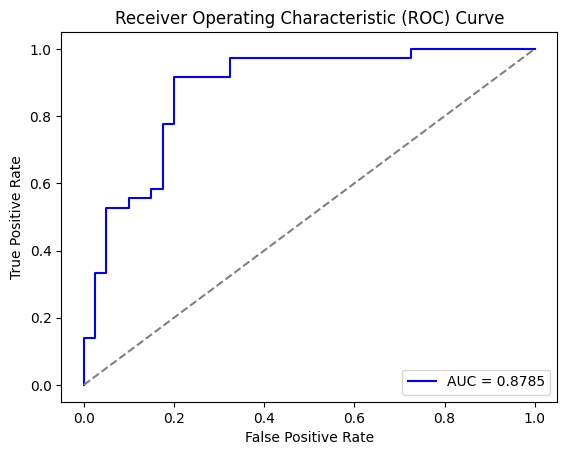

In [23]:


# Define the parameter space for Random Search
param_dist = {
    'n_estimators': np.arange(50, 301, 50),      # Number of trees (boosting stages)
    'learning_rate': np.linspace(0.01, 0.2, 10), # Learning rate
    'max_depth': np.arange(1, 6),                # Maximum depth of each tree
    'min_samples_split': np.arange(2, 11),       # Minimum number of samples to split a node
    'min_samples_leaf': np.arange(1, 6),         # Minimum number of samples per leaf node
    'subsample': np.linspace(0.6, 1.0, 5),       # Fraction of samples used for fitting the trees
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb, 
    param_distributions=param_dist,
    n_iter=20,               # Number of parameter settings sampled
    scoring='roc_auc',        # Scoring metric (AUC)
    cv=5,                     # Cross-validation splits
    random_state=42,
    n_jobs=-1,                # Use all available cores
    verbose=2
)

# Fit RandomizedSearchCV
random_search.fit(X_entrainement, y_entrainement)

# Get the best model from RandomizedSearchCV
best_gb = random_search.best_estimator_

# Make predictions
y_pred = best_gb.predict(X_test)
y_pred_prob = best_gb.predict_proba(X_test)[:, 1]

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Best parameters: {random_search.best_params_}")
print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')
print(classification_report(y_test, y_pred))

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
# Print the scores and the average accuracy
print("Cross-validation scores:", scores)
print("Average accuracy:", np.mean(scores))

Cross-validation scores: [0.90163934 0.75409836 0.9        0.8        0.83333333]
Average accuracy: 0.8378142076502731
